In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from copy import deepcopy
import pickle
from matplotlib.ticker import AutoMinorLocator
%pylab inline 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Populating the interactive namespace from numpy and matplotlib


C:\Users\laeti\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Ouverture des données

In [2]:
from pickle import *

In [111]:
f = open("Xz","rb")
X = load(f)
f.close()
   

In [112]:
X.shape

(1560, 79)

# Séparer le jeu de données

In [113]:
y = X['SiteEnergyUse(kBtu)']

In [114]:
X.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)', 'ENERGYSTARScore'], axis = 1, inplace = True)

In [115]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state = 1)

In [116]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1092, 76)
(468, 76)
(1092,)
(468,)


In [117]:
ytrain

520     2.886142e+06
35      6.399128e+06
830     9.666771e+05
1246    1.637815e+07
575     1.396275e+07
            ...     
715     1.467060e+06
905     7.947246e+05
1096    7.971703e+05
235     1.809102e+06
1061    5.381105e+06
Name: SiteEnergyUse(kBtu), Length: 1092, dtype: float64

In [118]:
# Centrage et Réduction
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(xtrain)# Crée l'objet et calcule la moyenne et l'écart-type
xtrain_scaled = std_scale.transform(xtrain)# Transforme les données.

std_scale_test =std_scale.transform(xtest)

# Prédictions

In [119]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(score_func=f_regression , k=50)
selector.fit(xtrain, ytrain)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=50, score_func=<function f_regression at 0x00000217DEDAD670>)

In [120]:
select_features_kbest = selector.get_support()
features = xtrain.columns[select_features_kbest]

## La régression linéaire

In [121]:
# Création d'un dataFrame vide pour enregistrer les score r²
data_scores = pd.DataFrame(columns=['Modèle','Score'])

In [122]:
model = LinearRegression().fit(xtrain[features], ytrain)

In [123]:
# Evaluation du training set
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
ytrain_pred = model.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [('Regression linéaire', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 7126535.7929750355
le score R2 est 0.6546421271748646


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5569398.973050194
le score R2 est 0.5723274391384001


,Modèle,Score
0,Regression linéaire,0.572327


Ridge

In [15]:
from sklearn.linear_model import Ridge

In [124]:
# define model
model = Ridge(alpha=0.1)
# fit model
model_ridge = model.fit(xtrain[features], ytrain)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.50894e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [125]:
ytrain_pred = model_ridge.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_ridge.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [('Ridge', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 7127246.024496038
le score R2 est 0.654573286920089


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5563888.457303608
le score R2 est 0.5731733223306312


,Modèle,Score
0,Regression linéaire,0.572327
1,Ridge,0.573173


Lasso

In [126]:
from sklearn import linear_model
linear_model2 = linear_model.Lasso(alpha = 0.1)
model = linear_model2.fit(xtrain[features], ytrain)

ytrain_pred = model.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [('Lasso', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 7126535.7929761605
le score R2 est 0.6546421271747556


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5569398.404438253
le score R2 est 0.5723275264654937


,Modèle,Score
0,Regression linéaire,0.572327
1,Ridge,0.573173
2,Lasso,0.572328


Elastic Net

In [127]:
#Elastic Net
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha = 0.01)
model_elastic = model.fit(xtrain[features], ytrain)

pred_train= model_elastic.predict(xtrain[features])
print('L`erreur quadratique pour le modèle d`entrainement est :' )
print(np.sqrt(mean_squared_error(ytrain,pred_train)))
print('Le R2 est :' )
print(r2_score(ytrain, pred_train))


pred_test= model_elastic.predict(xtest[features])
print('------------------------------------------------' )
print('L`erreur quadratique pour le modèle test est :' )
print(np.sqrt(mean_squared_error(ytest,pred_test)))
print('Le R2 est :' )
print(r2_score(ytest, pred_test))

liste = [('Elastic Net', r2_score(ytest, pred_test) )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)

L`erreur quadratique pour le modèle d`entrainement est :
7507921.185382618
Le R2 est :
0.6166885175363309
------------------------------------------------
L`erreur quadratique pour le modèle test est :
5463858.507600137
Le R2 est :
0.5883827043833503


,Modèle,Score
0,Regression linéaire,0.572327
1,Ridge,0.573173
2,Lasso,0.572328
3,Elastic Net,0.588383


Validation croisée du Elastic Net

Amélioration du modèle 

In [128]:
from sklearn.model_selection import GridSearchCV
param_alpha={'alpha':[0.01, 0.02, 0.05, 0.06, 0.08, 0.1]}
model = GridSearchCV(estimator = model_elastic, param_grid = param_alpha, scoring = 'r2', cv=5)
model.fit(xtrain[features], ytrain)
print(pd.DataFrame(model.cv_results_).loc[:,['params','mean_test_score']])
print(model.best_params_)
print(model.best_score_)

            params  mean_test_score
0  {'alpha': 0.01}         0.550236
1  {'alpha': 0.02}         0.538390
2  {'alpha': 0.05}         0.520783
3  {'alpha': 0.06}         0.517525
4  {'alpha': 0.08}         0.512670
5   {'alpha': 0.1}         0.509154
{'alpha': 0.01}
0.5502361340084937


L'hyperparamètre à choisir pour l'ElasticNet est alpha = 0.01 

Amélioration du modèle par le log

In [129]:
model =  ElasticNet(alpha = 0.01)
model_elastic = model.fit(xtrain[features], np.log(ytrain+1)) 

pred_train= np.exp(model_elastic.predict(xtrain[features]))-1
print('L`erreur quadratique pour le modèle d`entrainement est :' )
print(np.sqrt(mean_squared_error(ytrain,pred_train)))
print('Le R2 est :' )
print(r2_score(ytrain, pred_train))


pred_test= np.exp(model_elastic.predict(xtest[features]))-1
print('------------------------------------------------' )
print('L`erreur quadratique pour le modèle test est :' )
print(np.sqrt(mean_squared_error(ytest,pred_test)))
print('Le R2 est :' )
print(r2_score(ytest, pred_test))

L`erreur quadratique pour le modèle d`entrainement est :
16116609.121662457
Le R2 est :
-0.7662808702394794
------------------------------------------------
L`erreur quadratique pour le modèle test est :
6854829.577956581
Le R2 est :
0.352129731175187


Le log n'améliore pas le modèle

Ici le meilleur modèle est l'ElasticNet avec un r² = 0.5883827043833503 et alpha = 0.01 sur les données tests. 

## SVR

In [130]:
from sklearn.svm import SVR
#epsilon définit la largeur du tube autour de l'hyperplan. C est le paramètre de régularisation.
regressor = SVR(kernel='rbf', C=1, epsilon = 10)
model_baseline = regressor.fit(xtrain[features], ytrain)

In [131]:
# Evaluation du training set

ytrain_pred = model_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 12817936.289188636
le score R2 est -0.11724555758275113


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 8927631.034371452
le score R2 est -0.09892282215006709


Augmentons l'hyperparamètre C

In [132]:
regressor = SVR(kernel='rbf', C=1000, epsilon = 10)
model_baseline = regressor.fit(xtrain[features], ytrain)

In [133]:
# Evaluation du training set

ytrain_pred = model_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 12809292.794139504
le score R2 est -0.11573928539259781


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 8918454.435961496
le score R2 est -0.09666484563110034


Amélioration du modèle

In [134]:
param_C={'C':[10000000, 20000000, 50000000, 65000000, 80000000, 100000000],
          'epsilon':[10, 20, 50, 65, 80, 100]}

In [135]:
model = GridSearchCV(estimator =model_baseline, param_grid = param_C, scoring = 'r2', cv=5)
model.fit(xtrain[features], ytrain)
print(pd.DataFrame(model.cv_results_).loc[:,['params','mean_test_score']])
print(model.best_params_)
print(model.best_score_)

                              params  mean_test_score
0     {'C': 10000000, 'epsilon': 10}         0.381815
1     {'C': 10000000, 'epsilon': 20}         0.381815
2     {'C': 10000000, 'epsilon': 50}         0.381814
3     {'C': 10000000, 'epsilon': 65}         0.381814
4     {'C': 10000000, 'epsilon': 80}         0.381813
5    {'C': 10000000, 'epsilon': 100}         0.381813
6     {'C': 20000000, 'epsilon': 10}         0.391249
7     {'C': 20000000, 'epsilon': 20}         0.391249
8     {'C': 20000000, 'epsilon': 50}         0.391248
9     {'C': 20000000, 'epsilon': 65}         0.391248
10    {'C': 20000000, 'epsilon': 80}         0.391247
11   {'C': 20000000, 'epsilon': 100}         0.391247
12    {'C': 50000000, 'epsilon': 10}         0.395065
13    {'C': 50000000, 'epsilon': 20}         0.395065
14    {'C': 50000000, 'epsilon': 50}         0.395065
15    {'C': 50000000, 'epsilon': 65}         0.395065
16    {'C': 50000000, 'epsilon': 80}         0.395065
17   {'C': 50000000, 'epsilo

Les meilleurs hyperparamètres sont : 'C': 50000000, 'epsilon': 10

In [140]:
regressor = SVR(kernel='rbf', C=50000000, epsilon = 10)
model_baseline = regressor.fit(xtrain[features], ytrain)

In [141]:
# Evaluation du training set

ytrain_pred = model_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [('SVR', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 9257049.807706231
le score R2 est 0.41728309132927055


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5608983.362992367
le score R2 est 0.5662264866586235


,Modèle,Score
0,Regression linéaire,0.572327
1,Ridge,0.573173
2,Lasso,0.572328
3,Elastic Net,0.588383
4,SVR,0.566226


Amélioration avec le log

In [138]:
regressor = SVR(kernel='rbf', C=50000000, epsilon = 10)
model_baseline = regressor.fit(xtrain[features], np.log(ytrain+1))

In [139]:
# Evaluation du training set

ytrain_pred = np.exp(model_baseline.predict(xtrain[features]))-1
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = np.exp(model_baseline.predict(xtest[features]))-1
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 13873604.47176726
le score R2 est -0.3088534948528172


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 10012721.444154773
le score R2 est -0.38228945420224814


Le log n'améliore pas la prédiction. 

## Decision tree

In [33]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

In [142]:
# create a regressor object
model = DecisionTreeRegressor(random_state = 44)
# fit the regressor with X and Y data
model_baseline = model.fit(xtrain[features], ytrain)
predictions = model.predict(xtest[features])

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

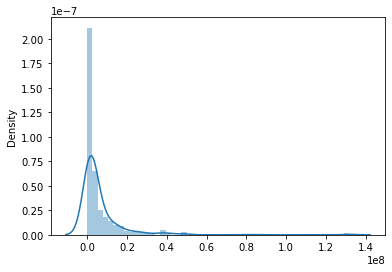

In [143]:
# checking difference between labled y and predicted y
sns.distplot(predictions)

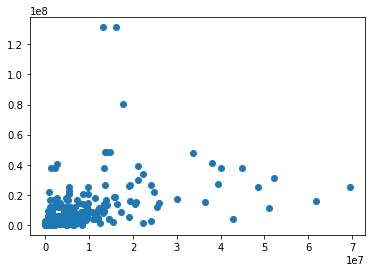

In [144]:
plt.scatter(ytest,predictions)

In [145]:
# Evaluation du training set

ytrain_pred = model_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 1355.4899669421272
le score R2 est 0.9999999875058984


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 11120739.220470063
le score R2 est -0.705147842297045


Validation croisée

In [146]:
parameters={"max_depth" : [1,3,5,7,9,11,12],
             "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            }

In [147]:
model = GridSearchCV(estimator =model_baseline, param_grid = parameters, scoring = 'r2', cv=5)
model.fit(xtrain[features], ytrain)
print(pd.DataFrame(model.cv_results_).loc[:,['params','mean_test_score']])
print(model.best_params_)
print(model.best_score_)

                                       params  mean_test_score
0     {'max_depth': 1, 'min_samples_leaf': 1}         0.278780
1     {'max_depth': 1, 'min_samples_leaf': 2}         0.278780
2     {'max_depth': 1, 'min_samples_leaf': 3}         0.278780
3     {'max_depth': 1, 'min_samples_leaf': 4}         0.278780
4     {'max_depth': 1, 'min_samples_leaf': 5}         0.278780
..                                        ...              ...
65   {'max_depth': 12, 'min_samples_leaf': 6}         0.449879
66   {'max_depth': 12, 'min_samples_leaf': 7}         0.415225
67   {'max_depth': 12, 'min_samples_leaf': 8}         0.414264
68   {'max_depth': 12, 'min_samples_leaf': 9}         0.419989
69  {'max_depth': 12, 'min_samples_leaf': 10}         0.420681

[70 rows x 2 columns]
{'max_depth': 5, 'min_samples_leaf': 6}
0.46584146935022785


Les meilleurs hyperparamètres sont : 'max_depth': 5, 'min_samples_leaf': 6

In [148]:
# create a regressor object
model = DecisionTreeRegressor(max_depth = 5, min_samples_leaf= 6, random_state = 44)
# fit the regressor with X and Y data
model_baseline = model.fit(xtrain[features], ytrain)

In [149]:
# Evaluation du training set

ytrain_pred = model_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 7620429.586973932
le score R2 est 0.605114371449802


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 6674280.346604747
le score R2 est 0.3858087627957628


Amélioration avec le log

In [150]:
# create a regressor object
model = DecisionTreeRegressor(max_depth = 5, min_samples_leaf= 6, random_state = 44)
# fit the regressor with X and y data
model_baseline = model.fit(xtrain[features], np.log(ytrain+1))

In [151]:
# Evaluation du training set

ytrain_pred = np.exp(model_baseline.predict(xtrain[features]))-1
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = np.exp(model_baseline.predict(xtest[features]))-1
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [('Decision tree', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 9295082.674366938
le score R2 est 0.41248503527883906


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5948698.638395814
le score R2 est 0.5120911872692351


,Modèle,Score
0,Regression linéaire,0.572327
1,Ridge,0.573173
2,Lasso,0.572328
3,Elastic Net,0.588383
4,SVR,0.566226
5,Decision tree,0.512091


Le log améliore le modèle

## Random forest

In [152]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr_baseline = regr.fit(xtrain[features], ytrain)

In [153]:
# Evaluation du training set

ytrain_pred = regr_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = regr_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 7801210.76441309
le score R2 est 0.5861562107348872


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 6029488.893564232
le score R2 est 0.4987484536905037


Validation croisée

In [154]:
params_random_forest = {'n_estimators':[14,50,100],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1,3,5,7,9,11,12,14,None],
               'min_samples_split': [1,3,10,20],
               }

In [155]:
model = GridSearchCV(estimator =regr_baseline, param_grid = params_random_forest, scoring = 'r2', cv=5)
model.fit(xtrain[features], ytrain)
print(pd.DataFrame(model.cv_results_).loc[:,['params','mean_test_score']])
print(model.best_params_)
print(model.best_score_)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

                                                params  mean_test_score
0    {'max_depth': 1, 'max_features': 'auto', 'min_...              NaN
1    {'max_depth': 1, 'max_features': 'auto', 'min_...              NaN
2    {'max_depth': 1, 'max_features': 'auto', 'min_...              NaN
3    {'max_depth': 1, 'max_features': 'auto', 'min_...         0.347513
4    {'max_depth': 1, 'max_features': 'auto', 'min_...         0.345689
..                                                 ...              ...
211  {'max_depth': None, 'max_features': 'sqrt', 'm...         0.523410
212  {'max_depth': None, 'max_features': 'sqrt', 'm...         0.544559
213  {'max_depth': None, 'max_features': 'sqrt', 'm...         0.503807
214  {'max_depth': None, 'max_features': 'sqrt', 'm...         0.514373
215  {'max_depth': None, 'max_features': 'sqrt', 'm...         0.532497

[216 rows x 2 columns]
{'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 20, 'n_estimators': 14}
0.5932437535573236


C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.34751295 0.34568901 0.3517864
 0.34751295 0.34568901 0.3517864  0.34751295 0.34568901 0.3517864
        nan        nan        nan 0.17512698 0.14117825 0.18738294
 0.17512698 0.14117825 0.18738294 0.17512698 0.14117825 0.18738294
        nan        nan        nan 0.46283947 0.46095549 0.46476411
 0.46996979 0.46656229 0.46845709 0.47954512 0.47882928 0.4757592
        nan        nan        nan 0.35529983 0.33618424 0.37301534
 0.35854051 0.33600939 0.37314754 0.35646658 0.33361803 0.37127178
        nan        nan        nan 0.55300571 0.53965585 0.54093783
 0.54793907 0.54466863 0.54731167 0.55208702 0.54500089 0.54960628
        nan        nan        nan 0.44610413 0.45356092 0.47324834
 0.4341986  0.43379518 0.45786919 0.45028235 0.42963551 0.45457979
        nan        nan        nan 0.58289238 0.5672194  

Les meilleurs hyperparametres sont : 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 20, 'n_estimators': 14

In [160]:
regr = RandomForestRegressor(max_depth= 14,  max_features ='auto', min_samples_split= 20, n_estimators = 14, random_state=0)
regr_baseline = regr.fit(xtrain[features], ytrain)

In [161]:
# Evaluation du training set

ytrain_pred = regr_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = regr_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [('Random forest', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 5301435.565884406
le score R2 est 0.8088829673031354


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5541779.563426189
le score R2 est 0.5765586945692049


,Modèle,Score
0,Regression linéaire,0.572327
1,Ridge,0.573173
2,Lasso,0.572328
3,Elastic Net,0.588383
4,SVR,0.566226
5,Decision tree,0.512091
6,Random forest,0.576559


Amélioration avec le log

In [158]:
regr = RandomForestRegressor(max_depth= 14,  max_features ='auto', min_samples_split= 3, n_estimators = 20, random_state=0)
regr_baseline = regr.fit(xtrain[features], np.log(ytrain+1))

In [159]:
# Evaluation du training set

ytrain_pred = np.exp(regr_baseline.predict(xtrain[features])) - 1
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = np.exp(regr_baseline.predict(xtest[features]))-1
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 5847754.248038216
le score R2 est 0.7674637602148299


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5692475.136946756
le score R2 est 0.5532166180772171


Le log n'améliore pas le modèle. 

## Regression Gradient Boosting

In [162]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
reg = ensemble.GradientBoostingRegressor(random_state=0)
reg_baseline = reg.fit(xtrain[features], ytrain)

In [163]:
# Evaluation du training set

ytrain_pred = reg_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = reg_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 3932241.7202445683
le score R2 est 0.8948539814069357


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5417412.586485739
le score R2 est 0.5953509257185539


validation croisée

In [164]:
params_2 = {
             "random_state":[0, 1, 3, 5],
             "max_depth": [4,6, 8, 10],
             "min_samples_split": [5,10, 15, 30]
        }

In [165]:
model = GridSearchCV(estimator =reg_baseline, param_grid = params_2, scoring = 'r2', cv=5)
model.fit(xtrain[features], ytrain)
print(pd.DataFrame(model.cv_results_).loc[:,['params','mean_test_score']])
print(model.best_params_)
print(model.best_score_)

                                               params  mean_test_score
0   {'max_depth': 4, 'min_samples_split': 5, 'rand...         0.568520
1   {'max_depth': 4, 'min_samples_split': 5, 'rand...         0.563373
2   {'max_depth': 4, 'min_samples_split': 5, 'rand...         0.564924
3   {'max_depth': 4, 'min_samples_split': 5, 'rand...         0.565938
4   {'max_depth': 4, 'min_samples_split': 10, 'ran...         0.569596
..                                                ...              ...
59  {'max_depth': 10, 'min_samples_split': 15, 'ra...         0.531587
60  {'max_depth': 10, 'min_samples_split': 30, 'ra...         0.555149
61  {'max_depth': 10, 'min_samples_split': 30, 'ra...         0.546701
62  {'max_depth': 10, 'min_samples_split': 30, 'ra...         0.556684
63  {'max_depth': 10, 'min_samples_split': 30, 'ra...         0.552450

[64 rows x 2 columns]
{'max_depth': 4, 'min_samples_split': 30, 'random_state': 1}
0.5805527116137525


les meilleurs hyperparamètres sont : 'max_depth': 4, 'min_samples_split': 30, et on ajoute 'random_state': 1.

In [166]:
reg = ensemble.GradientBoostingRegressor(max_depth = 4, min_samples_split = 30 , random_state = 1)
reg_baseline = reg.fit(xtrain[features], ytrain)

In [168]:
# Evaluation du training set

ytrain_pred = reg_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = reg_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [('Regression Gradient Boosting', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 3684232.7143275635
le score R2 est 0.9076989740395807


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5176755.216602286
le score R2 est 0.6305037918196277


,Modèle,Score
0,Regression linéaire,0.572327
1,Ridge,0.573173
2,Lasso,0.572328
3,Elastic Net,0.588383
4,SVR,0.566226
5,Decision tree,0.512091
6,Random forest,0.576559
7,Regression Gradient Boosting,0.630504


Amélioration avec le log

In [169]:
reg = ensemble.GradientBoostingRegressor(max_depth = 4, min_samples_split = 30 , random_state = 1)
reg_baseline = reg.fit(xtrain[features], np.log(ytrain+1))

In [170]:
# Evaluation du training set

ytrain_pred = np.exp(reg_baseline.predict(xtrain[features]))-1
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = np.exp(reg_baseline.predict(xtest[features]))-1
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 6492193.572607464
le score R2 est 0.7133873596541203


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5474733.304436834
le score R2 est 0.5867425780751154


Le log n'améliore pas le modèle. 
Le meilleur modèle de Regression Gradient Boosting est celui qui a les hyperparamètres max_depth = 4, min_samples_split = 30.

## Adaboost regression

In [171]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr_baseline = regr.fit(xtrain[features], ytrain)

In [172]:
# Evaluation du training set

ytrain_pred = regr_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = regr_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 18616755.091277096
le score R2 est -1.3567873057628015


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 18967987.33133054
le score R2 est -3.9606344863210365


Validation croisée

In [173]:
parametres_adaboost ={'n_estimators':[500,1000,2000],'learning_rate':[0.001,0.01,0.1],'random_state':[1]}

In [174]:
model = GridSearchCV(estimator =regr_baseline, param_grid = parametres_adaboost, scoring = 'r2', cv=5)
model.fit(xtrain[features], ytrain)
print(pd.DataFrame(model.cv_results_).loc[:,['params','mean_test_score']])
print(model.best_params_)
print(model.best_score_)

                                              params  mean_test_score
0  {'learning_rate': 0.001, 'n_estimators': 500, ...         0.388326
1  {'learning_rate': 0.001, 'n_estimators': 1000,...         0.386903
2  {'learning_rate': 0.001, 'n_estimators': 2000,...         0.442786
3  {'learning_rate': 0.01, 'n_estimators': 500, '...         0.444795
4  {'learning_rate': 0.01, 'n_estimators': 1000, ...         0.429182
5  {'learning_rate': 0.01, 'n_estimators': 2000, ...         0.405894
6  {'learning_rate': 0.1, 'n_estimators': 500, 'r...         0.328617
7  {'learning_rate': 0.1, 'n_estimators': 1000, '...         0.328617
8  {'learning_rate': 0.1, 'n_estimators': 2000, '...         0.328617
{'learning_rate': 0.01, 'n_estimators': 500, 'random_state': 1}
0.4447953371821858


Les meilleurs hyperparamètres 'learning_rate': 0.001, 'n_estimators': 500  et on rajoute 'random_state': 1

In [179]:
regr = AdaBoostRegressor(random_state=1, n_estimators=500, learning_rate = 0.001)
regr_baseline = regr.fit(xtrain[features], ytrain)


In [180]:
# Evaluation du training set

ytrain_pred = regr_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = regr_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [('Adaboost regression', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 6722631.367158334
le score R2 est 0.6926798656815958


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5666518.054205875
le score R2 est 0.5572818979240589


,Modèle,Score
0,Regression linéaire,0.572327
1,Ridge,0.573173
2,Lasso,0.572328
3,Elastic Net,0.588383
4,SVR,0.566226
5,Decision tree,0.512091
6,Random forest,0.576559
7,Regression Gradient Boosting,0.630504
8,Adaboost regression,0.557282


Amélioration avec le log

In [177]:
regr = AdaBoostRegressor(random_state=1, n_estimators=500, learning_rate = 0.001)
regr_baseline = regr.fit(xtrain[features], np.log(ytrain+1))

In [178]:
# Evaluation du training set

ytrain_pred = np.exp(regr_baseline.predict(xtrain[features]))-1
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = np.exp(regr_baseline.predict(xtest[features]))-1
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 10233687.633547856
le score R2 est 0.2878413844236225


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 6277086.400840175
le score R2 est 0.4567359844461246


Le log n'améliore pas le modèle

## Conclusion

Le meilleur modèle est Regression Gradient Boosting avec les hyperparamètres max_depth = 4, min_samples_split = 30 et un  
r² = 0.6305037918196277

In [181]:
data_scores.head(10)

,Modèle,Score
0,Regression linéaire,0.572327
1,Ridge,0.573173
2,Lasso,0.572328
3,Elastic Net,0.588383
4,SVR,0.566226
5,Decision tree,0.512091
6,Random forest,0.576559
7,Regression Gradient Boosting,0.630504
8,Adaboost regression,0.557282


In [182]:
data_scores_new = data_scores.set_index('Modèle')
data_scores_new

,Score
Modèle,
Regression linéaire,0.572327
Ridge,0.573173
Lasso,0.572328
Elastic Net,0.588383
SVR,0.566226
Decision tree,0.512091
Random forest,0.576559
Regression Gradient Boosting,0.630504
Adaboost regression,0.557282


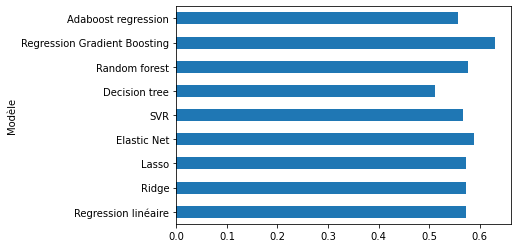

In [183]:
ax = data_scores_new['Score'].plot.barh(x='Modèle')